Lab 1

In [3]:
!pip install gdown

  Using cached gdown-4.2.0-py3-none-any.whl


In [4]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: D:\horse-or-human.zip

  0%|          | 0.00/150M [00:00<?, ?B/s]
  0%|          | 524k/150M [00:00<01:04, 2.30MB/s]
  1%|1         | 1.57M/150M [00:00<00:29, 4.95MB/s]
  3%|2         | 4.19M/150M [00:00<00:12, 12.0MB/s]
  6%|5         | 8.39M/150M [00:00<00:08, 16.7MB/s]
 12%|#1        | 17.3M/150M [00:01<00:06, 19.8MB/s]
 13%|#2        | 19.4M/150M [00:01<00:06, 20.0MB/s]
 17%|#7        | 25.7M/150M [00:01<00:07, 17.3MB/s]
 20%|#9        | 29.4M/150M [00:01<00:05, 20.1MB/s]
 22%|##2       | 33.0M/150M [00:01<00:05, 22.9MB/s]
 24%|##4       | 36.2M/150M [00:02<00:07, 15.8MB/s]
 28%|##8       | 42.5M/150M [00:02<00:05, 19.0MB/s]
 32%|###1      | 47.2M/150M [00:02<00:04, 22.5MB/s]
 34%|###3      | 50.3M/150M [00:02<00:04, 23.0MB/s]
 36%|###5      | 53.5M/150M [00:02<00:04, 22.3MB/s]
 39%|###8      | 58.2M/150M [00:02<00:03, 25.9MB/s]
 41%|####1     | 61.3M/150M [00:03<00:04, 21.3MB/s]
 45%|####4   

In [5]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [6]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

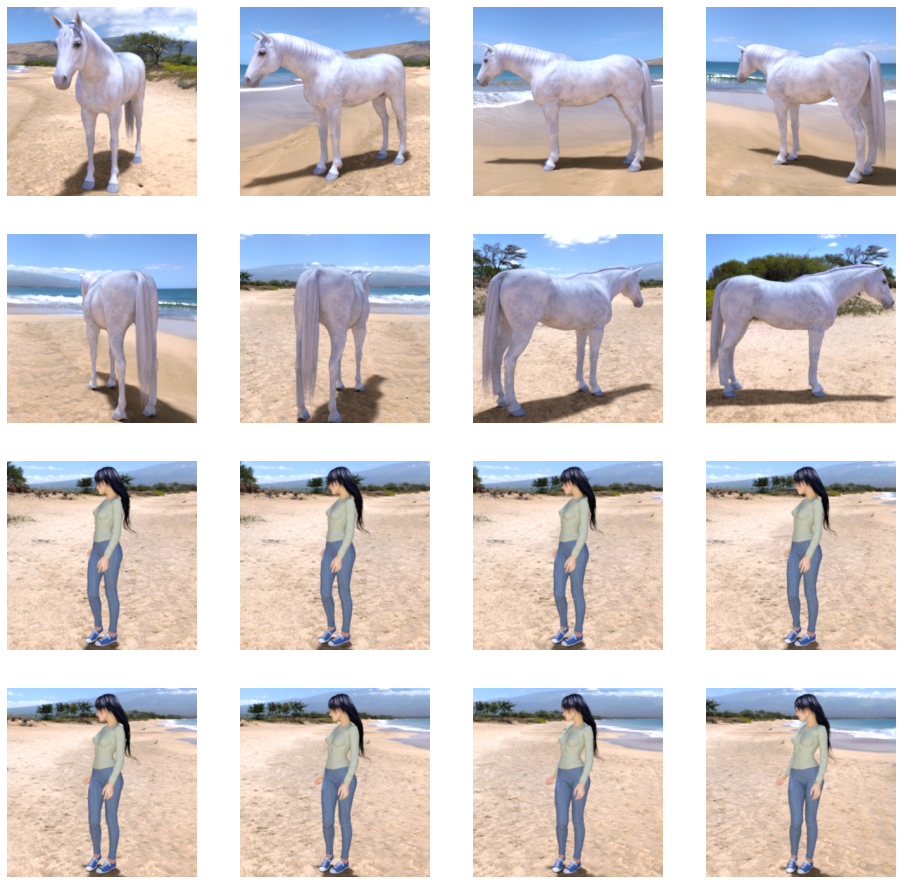

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 39s 5s/step - loss: 0.8345 - accuracy: 0.5217
Epoch 2/15
8/8 [==============================] - 31s 4s/step - loss: 1.1385 - accuracy: 0.5317
Epoch 3/15
8/8 [==============================] - 33s 4s/step - loss: 0.7572 - accuracy: 0.6602
Epoch 4/15
8/8 [==============================] - 34s 4s/step - loss: 0.5938 - accuracy: 0.7734
Epoch 5/15
8/8 [==============================] - 30s 4s/step - loss: 0.4655 - accuracy: 0.8042
Epoch 6/15
8/8 [==============================] - 31s 4s/step - loss: 0.4912 - accuracy: 0.8120
Epoch 7/15
8/8 [==============================] - 31s 4s/step - loss: 1.1290 - accuracy: 0.7875
Epoch 8/15
8/8 [==============================] - 30s 4s/step - loss: 0.2905 - accuracy: 0.8877
Epoch 9/15
8/8 [==============================] - 32s 4s/step - loss: 0.1148 - accuracy: 0.9600
Epoch 10/15
8/8 [==============================] - 31s 4s/step - loss: 0.0568 - accuracy: 0.9789
Epoch 11/15
8/8 [======================

In [18]:
!pip install google-colab --user

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\tlarj\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\tlarj\\AppData\\Local\\Temp\\pip-install-t2j623qv\\pandas_dbd881ac6e9042c08c1beb4f41f41150\\setup.py'"'"'; __file__='"'"'C:\\Users\\tlarj\\AppData\\Local\\Temp\\pip-install-t2j623qv\\pandas_dbd881ac6e9042c08c1beb4f41f41150\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\tlarj\AppData\Local\Temp\pip-wheel-9t8hfwe7'
       cwd: C:\Users\tlarj\AppData\Local\Temp\pip-install-t2j623qv\pandas_dbd881ac6e9042c08c1beb4f41f41150\
  Complete output (9 lines):

  Using cached google_colab-1.0.0-py2.py3-none-any.whl
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Using cached portpicker-1.2.0-py3-none-any.whl
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached prompt_toolkit-1.0.18-py3-none-any.whl (245 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Running setup.py clean for pandas
Failed to build pandas
    Running setup.py install for pandas: started
    Running setup.py install for pandas: finished with status 'error'



  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\tlarj\AppData\Local\Temp\pip-install-t2j623qv\pandas_dbd881ac6e9042c08c1beb4f41f41150\setup.py", line 735, in <module>
      ext_modules=maybe_cythonize(extensions, compiler_directives=directives),
    File "C:\Users\tlarj\AppData\Local\Temp\pip-install-t2j623qv\pandas_dbd881ac6e9042c08c1beb4f41f41150\setup.py", line 488, in maybe_cythonize
      build_ext.render_templates(_pxifiles)
    File "C:\Users\tlarj\AppData\Local\Temp\pip-install-t2j623qv\pandas_dbd881ac6e9042c08c1beb4f41f41150\setup.py", line 108, in render_templates
      os.stat(pxifile).st_mtime < os.stat(outfile).st_mtime):
  FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'pandas\\_libs/algos_common_helper.pxi.in'
  ----------------------------------------
  ERROR: Failed building wheel for pandas
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

ModuleNotFoundError: No module named 'google.colab'

<ipython-input-24-d5bfb57b081c>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


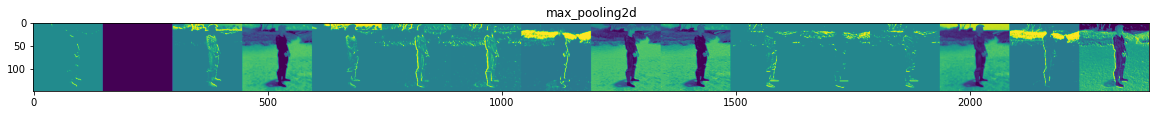

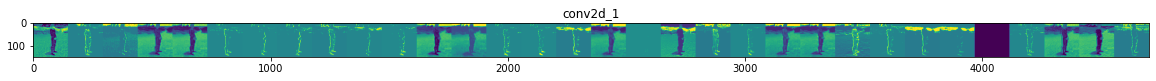

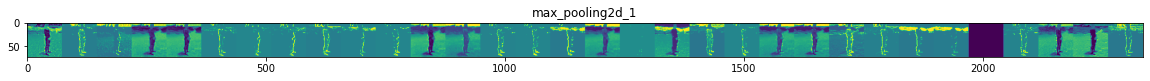

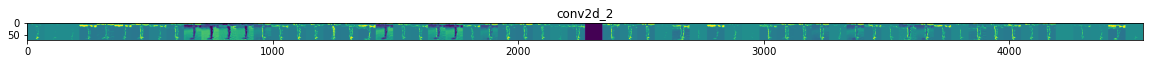

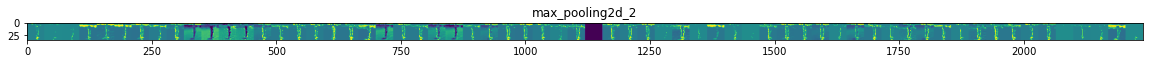

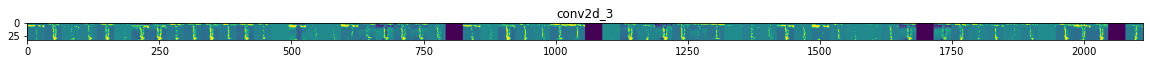

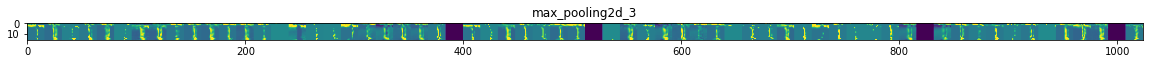

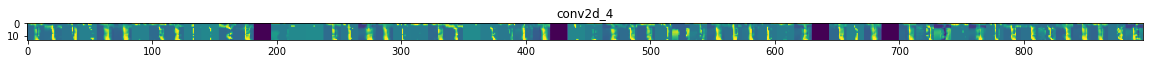

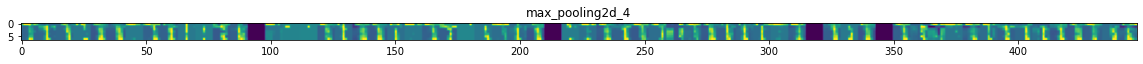

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [25]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

AttributeError: module 'signal' has no attribute 'SIGKILL'

Lab2

In [29]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: D:\horse-or-human.zip

  0%|          | 0.00/150M [00:00<?, ?B/s]
  0%|          | 524k/150M [00:00<01:04, 2.30MB/s]
  1%|1         | 1.57M/150M [00:00<00:30, 4.79MB/s]
  4%|3         | 5.24M/150M [00:00<00:09, 14.9MB/s]
  6%|6         | 9.44M/150M [00:00<00:07, 18.8MB/s]
 11%|#         | 16.3M/150M [00:00<00:04, 31.7MB/s]
 14%|#3        | 20.4M/150M [00:01<00:06, 19.5MB/s]
 16%|#6        | 24.6M/150M [00:01<00:05, 23.2MB/s]
 19%|#8        | 28.3M/150M [00:01<00:07, 16.1MB/s]
 22%|##2       | 33.0M/150M [00:01<00:05, 20.3MB/s]
 24%|##4       | 36.2M/150M [00:02<00:06, 17.7MB/s]
 27%|##6       | 39.8M/150M [00:02<00:05, 20.4MB/s]
 29%|##8       | 43.0M/150M [00:02<00:05, 20.4MB/s]
 31%|###1      | 46.7M/150M [00:02<00:04, 23.5MB/s]
 34%|###3      | 50.3M/150M [00:02<00:03, 26.0MB/s]
 36%|###5      | 53.5M/150M [00:02<00:04, 22.1MB/s]
 39%|###8      | 57.7M/150M [00:02<00:03, 25.7MB/s]
 41%|####    

In [30]:
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: D:\validation-horse-or-human.zip

  0%|          | 0.00/11.5M [00:00<?, ?B/s]
  5%|4         | 524k/11.5M [00:00<00:05, 2.17MB/s]
 14%|#3        | 1.57M/11.5M [00:00<00:02, 4.78MB/s]
 46%|####5     | 5.24M/11.5M [00:00<00:00, 14.9MB/s]
 78%|#######7  | 8.91M/11.5M [00:00<00:00, 21.5MB/s]
100%|##########| 11.5M/11.5M [00:00<00:00, 18.9MB/s]


In [31]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [32]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [33]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [34]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

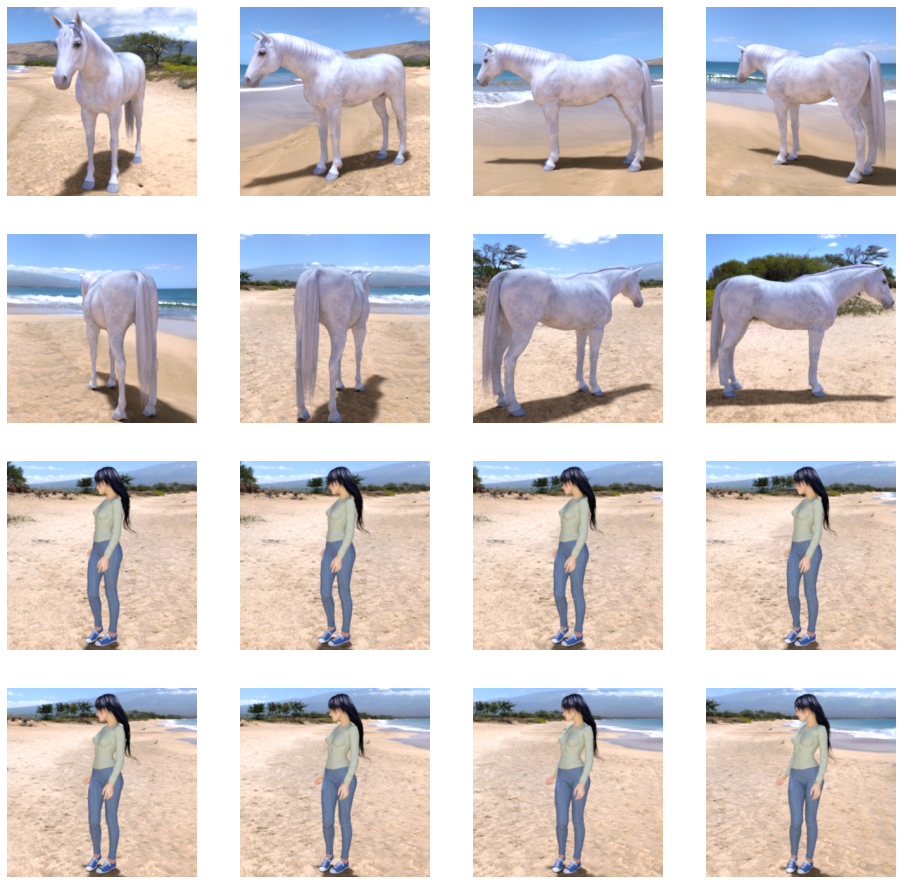

In [36]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [37]:
import tensorflow as tf

In [38]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [40]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [42]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 40s 5s/step - loss: 0.7965 - accuracy: 0.5284 - val_loss: 0.8860 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 30s 4s/step - loss: 0.6387 - accuracy: 0.6363 - val_loss: 4.1620 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 28s 3s/step - loss: 0.6544 - accuracy: 0.7297 - val_loss: 0.5416 - val_accuracy: 0.7930
Epoch 4/15
8/8 [==============================] - 28s 4s/step - loss: 0.5281 - accuracy: 0.7742 - val_loss: 1.8049 - val_accuracy: 0.6484
Epoch 5/15
8/8 [==============================] - 29s 3s/step - loss: 0.3764 - accuracy: 0.8365 - val_loss: 4.1311 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 29s 4s/step - loss: 0.9356 - accuracy: 0.8065 - val_loss: 0.9538 - val_accuracy: 0.8281
Epoch 7/15
8/8 [==============================] - 29s 3s/step - loss: 0.2168 - accuracy: 0.9143 - val_loss: 1.2910 - val_accuracy: 0.7461
Epoch 8/15
8/8 [==================

In [43]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

ModuleNotFoundError: No module named 'google.colab'

<ipython-input-44-d5bfb57b081c>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


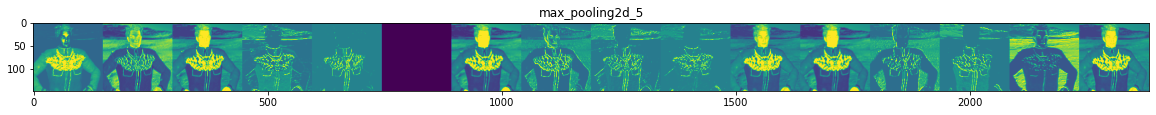

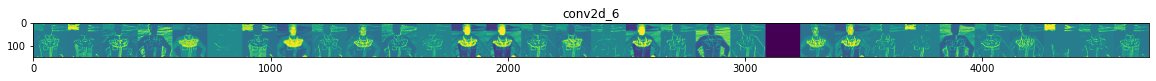

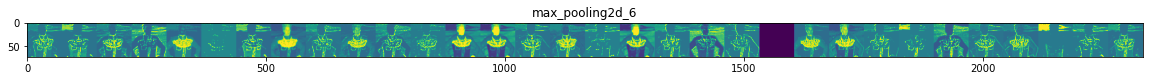

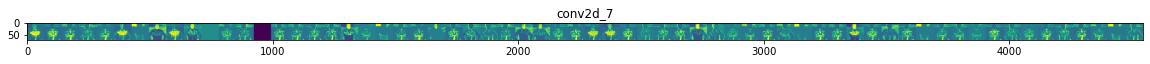

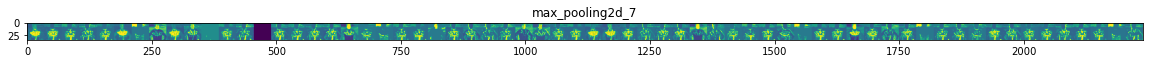

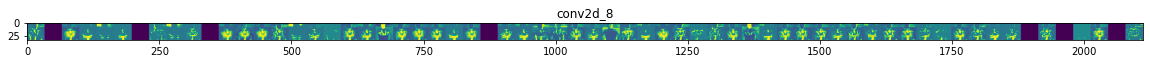

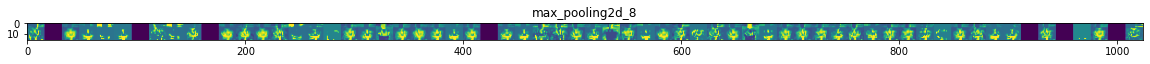

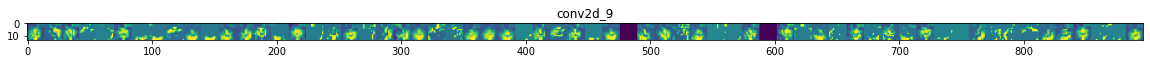

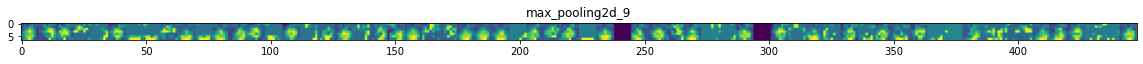

In [44]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [45]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

AttributeError: module 'signal' has no attribute 'SIGKILL'

Lab 3

In [46]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: D:\horse-or-human.zip

  0%|          | 0.00/150M [00:00<?, ?B/s]
  0%|          | 524k/150M [00:00<01:03, 2.33MB/s]
  1%|1         | 1.57M/150M [00:00<00:30, 4.82MB/s]
  4%|3         | 5.24M/150M [00:00<00:09, 14.8MB/s]
  5%|5         | 7.86M/150M [00:00<00:09, 15.5MB/s]
  7%|6         | 9.96M/150M [00:00<00:09, 14.7MB/s]
 13%|#2        | 19.4M/150M [00:00<00:03, 34.8MB/s]
 19%|#8        | 28.3M/150M [00:00<00:02, 48.7MB/s]
 23%|##3       | 34.6M/150M [00:01<00:02, 51.5MB/s]
 27%|##6       | 40.4M/150M [00:01<00:02, 52.7MB/s]
 31%|###       | 46.1M/150M [00:01<00:02, 50.4MB/s]
 36%|###6      | 54.0M/150M [00:01<00:01, 56.6MB/s]
 40%|####      | 60.3M/150M [00:01<00:02, 44.0MB/s]
 47%|####7     | 70.8M/150M [00:01<00:01, 57.3MB/s]
 52%|#####1    | 77.6M/150M [00:01<00:01, 50.5MB/s]
 56%|#####5    | 83.4M/150M [00:02<00:01, 47.8MB/s]
 61%|######1   | 91.8M/150M [00:02<00:01, 55.2MB/s]
 66%|######5 

In [47]:
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: D:\validation-horse-or-human.zip

  0%|          | 0.00/11.5M [00:00<?, ?B/s]
  5%|4         | 524k/11.5M [00:00<00:05, 2.18MB/s]
 14%|#3        | 1.57M/11.5M [00:00<00:02, 4.69MB/s]
 37%|###6      | 4.19M/11.5M [00:00<00:00, 11.4MB/s]
 78%|#######7  | 8.91M/11.5M [00:00<00:00, 19.9MB/s]
100%|##########| 11.5M/11.5M [00:00<00:00, 17.2MB/s]


In [48]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [49]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [50]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

In [51]:
import tensorflow as tf

In [52]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [54]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [56]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 13s 2s/step - loss: 3.1510 - accuracy: 0.5373 - val_loss: 0.6127 - val_accuracy: 0.7109
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.8972 - accuracy: 0.6941 - val_loss: 0.4800 - val_accuracy: 0.8867
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.6073 - accuracy: 0.7464 - val_loss: 0.5590 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 10s 1s/step - loss: 0.2950 - accuracy: 0.8999 - val_loss: 0.5006 - val_accuracy: 0.8750
Epoch 5/15
8/8 [==============================] - 10s 1s/step - loss: 0.2640 - accuracy: 0.9088 - val_loss: 0.5628 - val_accuracy: 0.8438
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.1765 - accuracy: 0.9255 - val_loss: 0.9759 - val_accuracy: 0.8438
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.0827 - accuracy: 0.9689 - val_loss: 1.0475 - val_accuracy: 0.8789
Epoch 8/15
8/8 [====================

In [57]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

ModuleNotFoundError: No module named 'google.colab'

<ipython-input-58-0765aa07c876>:44: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


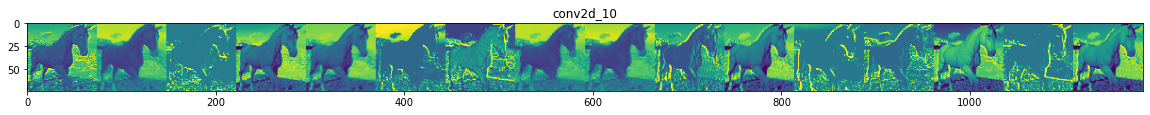

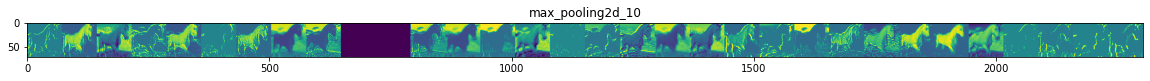

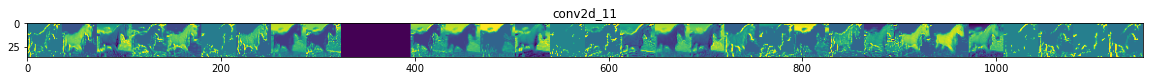

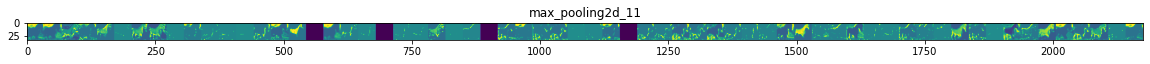

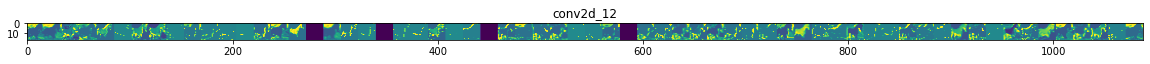

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [59]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

AttributeError: module 'signal' has no attribute 'SIGKILL'

In [ ]:
n 